## Task 1 using the Dataset for Regression Task

#### a)	Import Data, head, tail, describe, shape & dtypes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
productPurchase = pd.read_csv("C:/Users/Anusha/Desktop/ML/Major Project/Data Set for Regression.csv")

In [3]:
productPurchase.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
productPurchase.tail()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,F,55+,1,C,2,0,20,NaN,NaN,365
550067,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
productPurchase.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
productPurchase.shape

(550068, 10)

In [7]:
productPurchase.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

#### b)	Box Plot, Histogram & Density Curve for Target Variable – Purchases

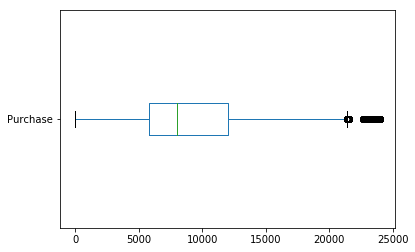

In [8]:
productPurchase.Purchase.plot(kind = 'box', vert = False)

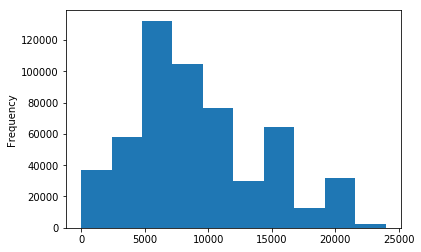

In [9]:
productPurchase.Purchase.plot(kind = 'hist')

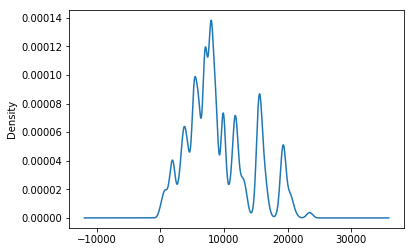

In [10]:
productPurchase.Purchase.plot(kind = 'density')

### c) HYPOTHESIS TESTING

#### 1) Gender with Purchases

In [11]:
from scipy import stats as st

In [12]:
productPurchase.Purchase.groupby(productPurchase.Gender).mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [13]:
male = productPurchase[productPurchase.Gender == 'M']      #subsetting the data
female = productPurchase[productPurchase.Gender == 'F']

**NULL** - There is no significant difference between the average purchases of male and female.        
**ALTERNATE** - There is significant difference between the average purchases of male and female.

In [14]:
st.ttest_ind(male.Purchase, female.Purchase)

Ttest_indResult(statistic=44.837957934353966, pvalue=0.0)

**Ans:** Since the p-value < 0.05, we REJECT NULL, there is significant difference between the average purchases of male and female.

#### 2) Age with purchases

In [15]:
productPurchase.Purchase.groupby(productPurchase.Age).mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [16]:
age0to17 = productPurchase[productPurchase.Age == '0-17']        #subsetting the data
age18to25 = productPurchase[productPurchase.Age == '18-25']
age26to35 = productPurchase[productPurchase.Age == '26-35']
age36to45 = productPurchase[productPurchase.Age == '36-45']
age46to50 = productPurchase[productPurchase.Age == '46-50']
age51to55 = productPurchase[productPurchase.Age == '51-55']
age55plus = productPurchase[productPurchase.Age == '55+']

**NULL** - There is no significant difference between the average purchases of different age groups.        
**ALTERNATE** - There is significant difference between the average purchases of different age groups.

In [17]:
st.f_oneway(age0to17.Purchase, age18to25.Purchase, age26to35.Purchase, age36to45.Purchase,
           age46to50.Purchase, age51to55.Purchase, age55plus.Purchase)

F_onewayResult(statistic=40.57579909450407, pvalue=1.053563939251671e-49)

**Ans:** Since the p-value > 0.05, we ACCEPT NULL, there is  no significant difference between the average purchases of different age groups.

#### 3) City Category with Purchases

In [43]:
productPurchase.Purchase.groupby(productPurchase.City_Category).mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [20]:
A = productPurchase[productPurchase.City_Category == 'A'] #subsetting the data
B = productPurchase[productPurchase.City_Category == 'B']
C = productPurchase[productPurchase.City_Category == 'C']

**NULL** - There is no significant difference between the average purchases in different cities.        
**ALTERNATE** - There is significant difference between the average purchases in different cities.

In [21]:
st.f_oneway(A.Purchase, B.Purchase, C.Purchase)

F_onewayResult(statistic=1130.7459610102974, pvalue=0.0)

**Ans:** Since the p-value < 0.05, we REJECT NULL, there is significant difference between the average purchases in different cities.

#### 4) Marital Status with Purchases

In [44]:
productPurchase.Purchase.groupby(productPurchase.Marital_Status).mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [23]:
unmarried = productPurchase[productPurchase.Marital_Status == 0]   #subsetting the data
married = productPurchase[productPurchase.Marital_Status == 1]

**NULL** - There is no significant difference between the average purchases of married and unmarried people.                                                                                                
**ALTERNATE** - There is significant difference between the average purchases of married and unmarried people.

In [24]:
st.ttest_ind(unmarried.Purchase, married.Purchase)

Ttest_indResult(statistic=0.3436698055440526, pvalue=0.7310947525758316)

**Ans:** Since the p-value > 0.05, we ACCEPT NULL, there is  no significant difference between the average purchases of married and unmarried people.

#### 5) Occupation with City Category

In [46]:
# Cross-tabulation 
pd.crosstab(productPurchase.Occupation, productPurchase.City_Category) 

City_Category,A,B,C
Occupation,,,
0,18858,29850,20930
1,12809,19756,14861
2,9232,11366,5990
3,5645,6905,5100
4,24205,29854,18249
5,2383,6615,3179
6,3755,10953,5647
7,16216,22986,19931
8,104,829,613


**NULL** - There is no dependence between city and occupation.                                                                                       
**ALTERNATE** - There is dependence between city and occupation.

In [25]:
st.chi2_contingency(pd.crosstab(productPurchase.Occupation, productPurchase.City_Category))

(19332.051033740736,
 0.0,
 40,
 array([[18701.1885076 , 29266.24594414, 21670.56554826],
        [12736.18665329, 19931.3733902 , 14758.43995651],
        [ 7140.17059709, 11173.94162903,  8273.88777388],
        [ 4739.883069  ,  7417.6346379 ,  5492.4822931 ],
        [19418.21331181, 30388.347048  , 22501.43964019],
        [ 3270.11649469,  5117.53750627,  3789.34599904],
        [ 5466.30707476,  8554.44493226,  6334.24799298],
        [15880.08529854, 24851.38748118, 18401.52722027],
        [  415.17616004,   649.72595752,   481.09788244],
        [ 1689.43934204,  2643.87192674,  1957.68873121],
        [ 3472.33360239,  5433.99523332,  4023.67116429],
        [ 3111.40426275,  4869.16231811,  3605.43341914],
        [ 8373.07729226, 13103.36716006,  9702.55554768],
        [ 2075.34370296,  3247.78926242,  2404.86703462],
        [ 7333.79414909, 11476.95095334,  8498.25489758],
        [ 3266.8939113 ,  5112.49435524,  3785.61173346],
        [ 6813.34693165, 10662.48206222,

**Ans:** Since the p-value < 0.05, we REJECT NULL, there is dependence between city and occupation.

#### 6) Occupation with Gender

In [47]:
# Cross-tabulation 
pd.crosstab(productPurchase.Occupation, productPurchase.Gender) 

Gender,F,M
Occupation,,
0,18112,51526
1,17984,29442
2,8629,17959
3,7919,9731
4,17836,54472
5,2220,9957
6,8160,12195
7,10028,49105
8,361,1185


**NULL** - There is no dependence between occupation and gender.                                                                                       
**ALTERNATE** - There is dependence between occupation and gender.

In [26]:
st.chi2_contingency(pd.crosstab(productPurchase.Occupation, productPurchase.Gender))

(41664.592979596964, 0.0, 20, array([[17193.26909037, 52444.73090963],
        [11709.23891955, 35716.76108045],
        [ 6564.44238167, 20023.55761833],
        [ 4357.6955031 , 13292.3044969 ],
        [17852.47855174, 54455.52144826],
        [ 3006.43955475,  9170.56044525],
        [ 5025.546287  , 15329.453713  ],
        [14599.6378575 , 44533.3621425 ],
        [  381.69956078,  1164.30043922],
        [ 1553.21600057,  4737.78399943],
        [ 3192.35143655,  9737.64856345],
        [ 2860.5246515 ,  8725.4753485 ],
        [ 7697.93700233, 23481.06299767],
        [ 1908.00401405,  5819.99598595],
        [ 6742.45362573, 20566.54637427],
        [ 3003.47681559,  9161.52318441],
        [ 6263.97125265, 19107.02874735],
        [ 9886.41365613, 30156.58634387],
        [ 1634.93822218,  4987.06177782],
        [ 2088.97799727,  6372.02200273],
        [ 8286.28761899, 25275.71238101]]))

**Ans:** Since the p-value < 0.05, we REJECT NULL, there is dependence between occupation and gender.

### d) IMPUTING MISSING VALUES

#### Clean the Missing values using the relevant strategy

In [30]:
(productPurchase.isnull().sum().sort_values(ascending = False))

Product_Category_3            383247
Product_Category_2            173638
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
dtype: int64

In [28]:
pd.value_counts(productPurchase.Product_Category_2)

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [29]:
pd.value_counts(productPurchase.Product_Category_3)

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

For missing value imputation you must have atleast 50% observations without missing values.            
For numerical data imputation is done using mean or median.                                            
For categorical & object data imputation is done using mode or most frequent.

Therefore, the Product_Category_3 column must not be considered for model building.                    
And the missing values in Product_Category_2 must be imputed with the mode.

In [48]:
# filling the missing values with "No Value"
productPurchase['Product_Category_3']=productPurchase['Product_Category_3'].fillna('No Value')

In [49]:
# filling the nan values with mode
productPurchase['Product_Category_2'].fillna(productPurchase['Product_Category_2'].value_counts().idxmax(),
                             inplace=True)

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

In [58]:
intcols = productPurchase.select_dtypes(include = ['int64'])
floatcols = productPurchase.select_dtypes(include = ['float64'])
objectcols = productPurchase.select_dtypes(include = ['object'])

In [59]:
intcols1 = intcols.apply(le.fit_transform)

In [60]:
# removing Product_Category_3 column
objectcols1 = objectcols.drop(['Product_Category_3'],axis=1)

In [61]:
objectcols2 = objectcols1.apply(le.fit_transform)

In [62]:
productPurchasedf = pd.concat([floatcols, intcols, objectcols2], axis = 1)

In [63]:
y = productPurchasedf.Purchase
X = productPurchasedf.drop('Purchase', axis = 1)

#### f)	Run the following Algorithms
#### g)	Predict for Each Model, Calculate the Residuals & Root Mean Square Error.

#### 1.	Multiple Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
LinReg = LinearRegression()

In [52]:
LinRegmodel = LinReg.fit(X, y)

In [53]:
LinRegmodel.score(X, y)

0.12562932383403058

In [54]:
LinRegpredict = LinRegmodel.predict(X)

In [55]:
priceresidual = y - LinRegpredict # Y = ActualPrice LineRegpredict = Predicted

In [56]:
np.sqrt(np.mean(priceresidual**2)) # Root Mean Square Error

4696.953162785419

#### 2.	Decision Tree Regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
DecTree = DecisionTreeRegressor()

In [59]:
DecTreemodel = DecTree.fit(X,y)

In [60]:
DecTreemodel.score(X,y)

0.7358126299646379

In [61]:
DecTreepredict = DecTreemodel.predict(X)

In [62]:
DecTreeresidual = y - DecTreepredict

In [63]:
np.sqrt(np.mean(DecTreeresidual**2)) # Root Mean Square Error

2581.8110970976736

#### 3.	Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
RF = RandomForestRegressor(n_estimators = 50) # n_estimators(num of trees) = 50

In [66]:
RFmodel = RF.fit(X,y)

In [67]:
RFmodel.score(X,y)

0.7314514687334754

In [68]:
RFpredict = RFmodel.predict(X)

In [69]:
RFresidual = y - RFpredict

In [70]:
np.sqrt(np.mean(RFresidual**2))

2603.0339242960445

#### 4.	Gradient Boosting Regressor

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
GB = GradientBoostingRegressor(n_estimators = 100)

In [73]:
GBmodel = GB.fit(X,y)

In [74]:
GBmodel.score(X,y)

0.6436912350907947

In [75]:
GBpredict = GBmodel.predict(X)

In [76]:
GBresidual = y - GBpredict

In [77]:
np.sqrt(np.mean(GBresidual**2))

2998.3456037703863

#### 5.	Neural Network Regressor

In [78]:
from sklearn.neural_network import MLPRegressor

In [79]:
NN = MLPRegressor(activation = 'relu', hidden_layer_sizes=(30,10,))

In [80]:
NNmodel = NN.fit(X, y)

In [81]:
NNmodel.score(X, y)

0.29477471131717703

In [82]:
NNpredict = NNmodel.predict(X)

In [83]:
NNresidual = y - NNpredict

In [84]:
np.sqrt(np.mean(NNresidual**2))

4218.250590907575

#### 6. KNN Regressor

In [85]:
from sklearn.neighbors import KNeighborsRegressor

In [86]:
KNN = KNeighborsRegressor()

In [87]:
KNNmodel = KNN.fit(X, y)

In [88]:
KNNmodel.score(X, y)

0.6577150692641461

In [89]:
KNNpredict = KNNmodel.predict(X)

In [90]:
KNNresidual = y - KNNpredict

In [91]:
np.sqrt(np.mean(KNNresidual**2))

2938.7478685902233

#### 7.	Support Vector Machine Regressor

In [2]:
from sklearn.svm import SVR

In [3]:
SupportVec = SVR()

In [ ]:
SupVecmodel = SupportVec.fit(X, y)

In [ ]:
SupVecmodel.score(X, y)

In [ ]:
SVRpredict = SupVecmodel.predict(X)

In [ ]:
SVRresidual = y - SVRpredict

In [ ]:
np.sqrt(np.mean(SVRresidual**2))

### THE BEST MODEL - DECISION TREE REGRESSOR / RANDOM FOREST REGRESSOR
### THE WORST MODEL - MULTIPLE LINEAR REGRESSION